### Importing Libraries

In [1]:
from sklearn.datasets import make_classification #generate classification datasets

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Dataset Generation

In [2]:
X, y = make_classification(n_samples = 100, n_features = 2, n_informative=2, n_redundant = 0, n_classes=2, 
                           n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)
#hypercube - if True then the clusters are kept at the vertices of a hypercube(geometrical shape), if False the clusters are put on the vertices of a random polytope.
#class_sep - greater values spread out the clusters

In [3]:
X.shape

(100, 2)

### Data Representation

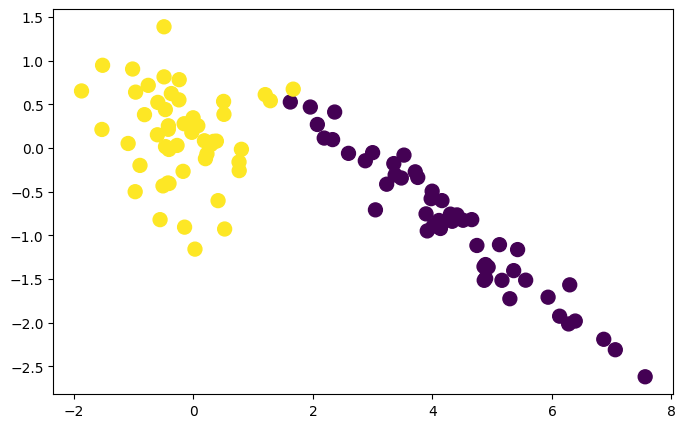

In [4]:
plt.figure(figsize = (8, 5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 100) #c - colours, s - marker size
plt.show()

### Step function

In [5]:
epochs = 1000
lr = 0.1 #learning rate
def step(z):
    if z > 0:
        return 1
    return 0

In [6]:
def perceptron_step(X, y):
    X = np.insert(X, 0, 1, axis = 1) # Adding a col of 1s to X
    weights = np.ones(X.shape[1])
    for i in range(epochs):
        j = np.random.randint(0, 100)
        y_pred = step(np.dot(X[j], weights))
        weights = weights + (lr*(y[j] - y_pred))*X[j]
    return weights[0], weights[1:]

In [7]:
intercept1, coefs1 = perceptron_step(X, y)

In [8]:
print(intercept1, " ", coefs1)

1.0   [-0.77790605  0.46365662]


In [9]:
# using line equations ax + by + c = 0, m = -a/b b = -c/b
#line using step function
m1 = - (coefs1[0]/ coefs1[1])
b1 = - (intercept1/ coefs1[1])

In [10]:
#(x, y) values for plotting the line
x1_input = np.linspace(-3, 3, 100)
y1_input = (m1 * x1_input) + b1

### Sigmoid function

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [12]:
def perceptron_sigmoid(X, y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    for i in range(epochs):
        j = np.random.randint(0, 100)
        y_pred = sigmoid(np.dot(X[j], weights))
        weights = weights + (lr*(y[j] - y_pred))*X[j]
    return weights[0], weights[1:]  

In [13]:
intercept2, coefs2 = perceptron_sigmoid(X, y)

In [14]:
print(intercept2, " ", coefs2)

3.8157703938971745   [-2.49698584  0.95847604]


In [15]:
#line using sigmoid function
m2 = - (coefs2[0]/ coefs2[1])
b2 = - (intercept2/ coefs2[1])

In [16]:
x2_input = np.linspace(-3, 3, 100)
y2_input = (m2 * x2_input) + b2

### Logistic Regression model

In [17]:
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression()

In [18]:
intercept3 = classifier.intercept_
coefs3 = classifier.coef_

In [19]:
print(intercept3, " ", coefs3)

[4.05050103]   [[-2.44268897  0.0507682 ]]


In [20]:
#line using logistic regression
m3 = - (coefs3[0][0]/ coefs3[0][1])
b3 = - (intercept3/ coefs3[0][1])

In [21]:
x3_input = np.linspace(-3, 3, 100)
y3_input = (m2 * x3_input) + b2

### Plotting lines

Sigmoid function and Logistic Regression line are overlapping

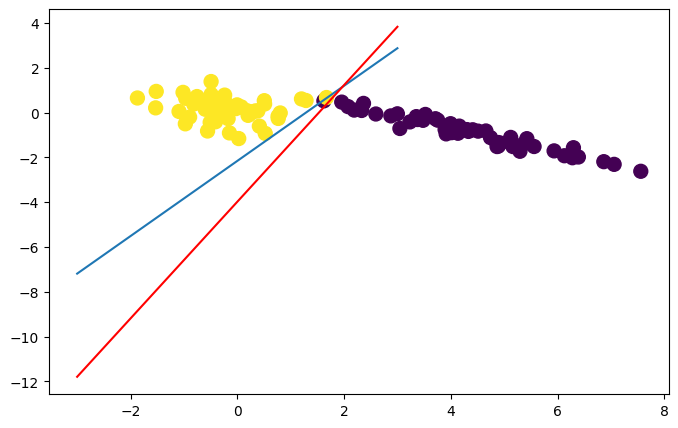

In [22]:
#blue line - step function
#red line - sigmoid function
plt.figure(figsize = (8, 5))
plt.plot(x1_input, y1_input)
plt.plot(x2_input, y2_input, c = 'r')
plt.scatter(X[:, 0], X[:, 1], c = y, s = 100)
plt.show()

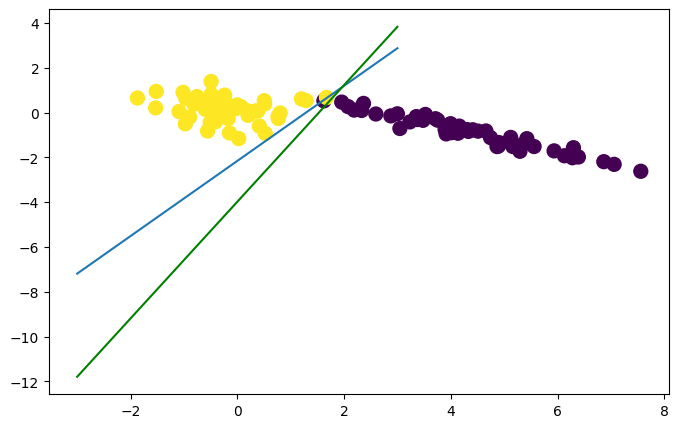

In [23]:
#blue line - step function
#green line - logistic regression
plt.figure(figsize = (8, 5))
plt.plot(x1_input, y1_input)
plt.plot(x3_input, y3_input, c = 'g')
plt.scatter(X[:, 0], X[:, 1], c = y, s = 100)
plt.show()